In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("../csv/homeprices_banglore.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../csv/homeprices_banglore.csv'

In [3]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis="columns"))
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
np.dot(scaled_y.T, scaled_X), scaled_X.T.dot(scaled_y)

(array([[4.25003556, 4.64827778]]),
 array([[4.25003556],
        [4.64827778]]))

In [5]:
def batch_gradient_descent(X: np.ndarray, y_true: np.ndarray, epochs: int = 100, 
                           learning_rate: float = 0.01) -> tuple[np.ndarray, int, float, list[float], list[int]]:
    
    number_of_features = X.shape[1]
    total_samples = X.shape[0]
    grad_coef = - (2 / total_samples)

    w = np.ones(number_of_features)
    b = 0
    mse = 0

    costs_list = []
    epochs_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b

        w_grad = grad_coef * (X.T.dot(y_true - y_pred))
        b_drad = grad_coef * np.sum(y_true - y_pred)

        w -= learning_rate * w_grad
        b -= learning_rate * b_drad

        mse = np.mean(np.square(y_true - y_pred )) # cost
        
        if i % 10 == 0:
            costs_list.append(mse)
            epochs_list.append(i)

        
    return w, b, mse, costs_list, epochs_list

w, b, mse, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, mse

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

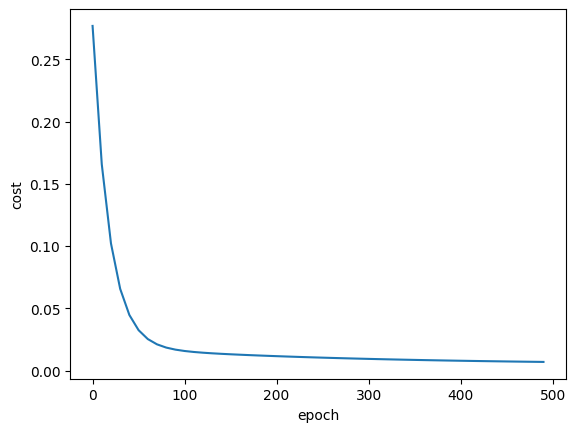

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [7]:
def stochastic_gradient_descent(X: np.ndarray, y_true: np.ndarray, epochs: int = 100, 
                                learning_rate: float = 0.01) -> tuple[np.ndarray, int, float, list[float], list[int]]:
    
    number_of_features = X.shape[1]
    total_samples = X.shape[0]
    grad_coef = - (2 / total_samples)

    w = np.ones(number_of_features)
    b = 0
    cost = 0

    costs_list = []
    epochs_list = []
    
    for i in range(epochs):
        random_index = np.random.randint(1, total_samples - 1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]

        y_pred = np.dot(w, sample_X.T) + b

        w_grad = grad_coef * (sample_X.T.dot(sample_y - y_pred))
        b_drad = grad_coef * (sample_y - y_pred)

        w -= learning_rate * w_grad
        b -= learning_rate * b_drad

        cost = np.square(sample_y - y_pred ) # cost
        
        if i % 100 == 0:
            costs_list.append(cost)
            epochs_list.append(i)
        
    return w, b, cost, costs_list, epochs_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.72522569, 0.70796092]), -0.267119521287909, 0.003876390534324317)

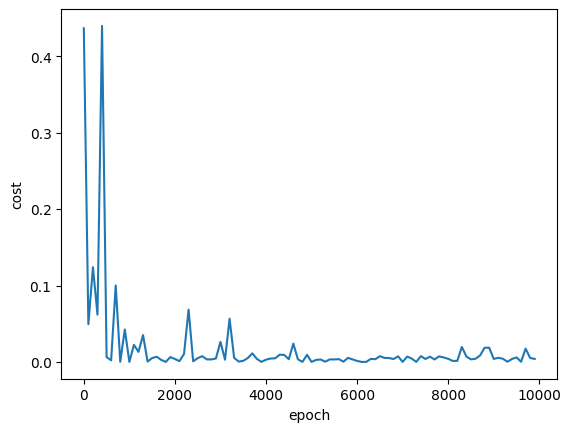

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [10]:
def mini_batch_gradient_descent(X: np.ndarray, y_true: np.ndarray, epochs: int = 100, batch_size: int = 5, 
                                learning_rate: float = 0.01) -> tuple[np.ndarray, int, float, list[float], list[int]]:
    
    number_of_features = X.shape[1]
    total_samples = X.shape[0]

    w = np.ones(number_of_features)
    b = 0
    mse = 0

    if batch_size > total_samples:
        batch_size = total_samples

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        rand_indexes = np.random.permutation(total_samples)
        X_tmp = X[rand_indexes]
        y_tmp = y_true[rand_indexes]

        for j in range(1, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]

            y_pred = np.dot(w, Xj.T) + b

            w_grad = - (2 / len(Xj)) * (Xj.T.dot(yj - y_pred))
            b_grad = - (2 / len(Xj)) * np.sum(yj - y_pred)

            w -= learning_rate * w_grad
            b -= learning_rate * b_grad

            mse = np.mean(np.square(yj - y_pred))

        if i % 10 == 0:
            cost_list.append(mse)
            epoch_list.append(i)

    return w, b, mse, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71111912, 0.68018741]), -0.2346640837148026, 0.004966837898451337)

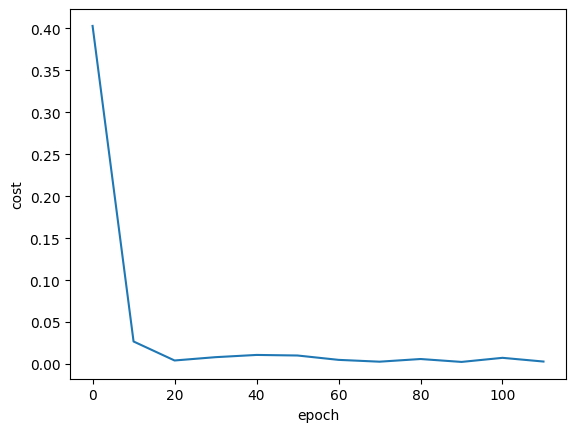

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [ ]:
def predict(area: int, bedrooms: int, w: np.ndarray, b: int) -> float:
    scaled_X = sx.transform(np.array([[area, bedrooms]]))[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform(np.array([[scaled_price]]))[0][0]

predict(2600, 4, w, b)

c:\Users\Артём\Desktop\лекции\Саморазвитие\dl_ind\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596